Projet Machine Learning 


In [139]:
# librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

1. data cleaning & EDA

In [140]:
# importing data
df=pd.read_csv("insurance_claims.csv")
#df.info()
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,415,52,794731,22-02-15,IN,250/500,1000,973.50,0,468634,...,YES,51090,7860,7860,35370,Toyota,Highlander,2003,N,NaN
1,89,32,266247,17-01-15,IN,100/300,2000,1482.53,0,620358,...,?,100,10,20,70,Audi,A3,2002,N,NaN
2,180,36,420948,03-01-15,IL,100/300,500,1272.46,0,456959,...,?,69630,12660,6330,50640,Toyota,Corolla,1998,N,NaN
3,160,37,921202,28-12-14,OH,500/1000,500,1374.22,0,472135,...,NO,72930,6630,13260,53040,Accura,TL,2015,N,NaN
4,256,43,883980,13-12-14,OH,100/300,500,1203.17,0,455810,...,?,63250,11500,5750,46000,Nissan,Ultima,1997,N,NaN


In [141]:
# processing data
df.replace('?', np.nan, inplace = True)
df.describe().transpose()

# missing values
df.isna().sum() / len(df) * 100
df = df.drop(columns='_c39') # _c39 column useless, we can drop it. 
df.drop_duplicates(inplace=True)

df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['authorities_contacted'] = df['authorities_contacted'].fillna('None')
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

# no more missing values :)

In [142]:
data_types = df.dtypes
print(data_types)

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [143]:
# let's check the unique values for each variable

print(df.nunique())
# we can drop var that have too many distinct values and are not relevant in our study: policy_number, insured_zip, incident_location (we have city
# and state already), insured_hobbies (no relevance here), auto_model (too many values, maker should be enough)

df=df.drop(columns='policy_number')
df=df.drop(columns='insured_zip')
df=df.drop(columns='incident_location')
df=df.drop(columns='insured_hobbies')
df=df.drop(columns='auto_model')

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [144]:
# info on numerical variables
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00
number_of_vehicles_involved,1000.0,1.839000e+00,1.018880e+00,1.00,1.0000,1.0,3.000,4.00
bodily_injuries,1000.0,9.920000e-01,8.201272e-01,0.00,0.0000,1.0,2.000,2.00


In [145]:
# categorical columns

categorical_col = df.select_dtypes(include = ['object'])
print(categorical_col.head())

# instead of incident_date, let's take the number of days from the policy_bind_date until the incident_date:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], format='%d-%m-%y')
df['incident_date'] = pd.to_datetime(df['incident_date'], format='%y-%m-%d')
df['days_difference_bind_incident'] = (df['incident_date'] - df['policy_bind_date']).dt.days

df=df.drop(columns='policy_bind_date')

  policy_bind_date policy_state policy_csl insured_sex  \
0         22-02-15           IN    250/500        MALE   
1         17-01-15           IN    100/300      FEMALE   
2         03-01-15           IL    100/300        MALE   
3         28-12-14           OH   500/1000      FEMALE   
4         13-12-14           OH    100/300      FEMALE   

  insured_education_level insured_occupation insured_relationship  \
0                     PhD  machine-op-inspct        not-in-family   
1                      MD       tech-support        not-in-family   
2                 College     prof-specialty                 wife   
3                      MD       craft-repair       other-relative   
4                      MD     prof-specialty            unmarried   

  incident_date             incident_type   collision_type incident_severity  \
0      02-02-15   Multi-vehicle Collision   Rear Collision        Total Loss   
1      23-01-15                Parked Car   Rear Collision    Trivial Damage

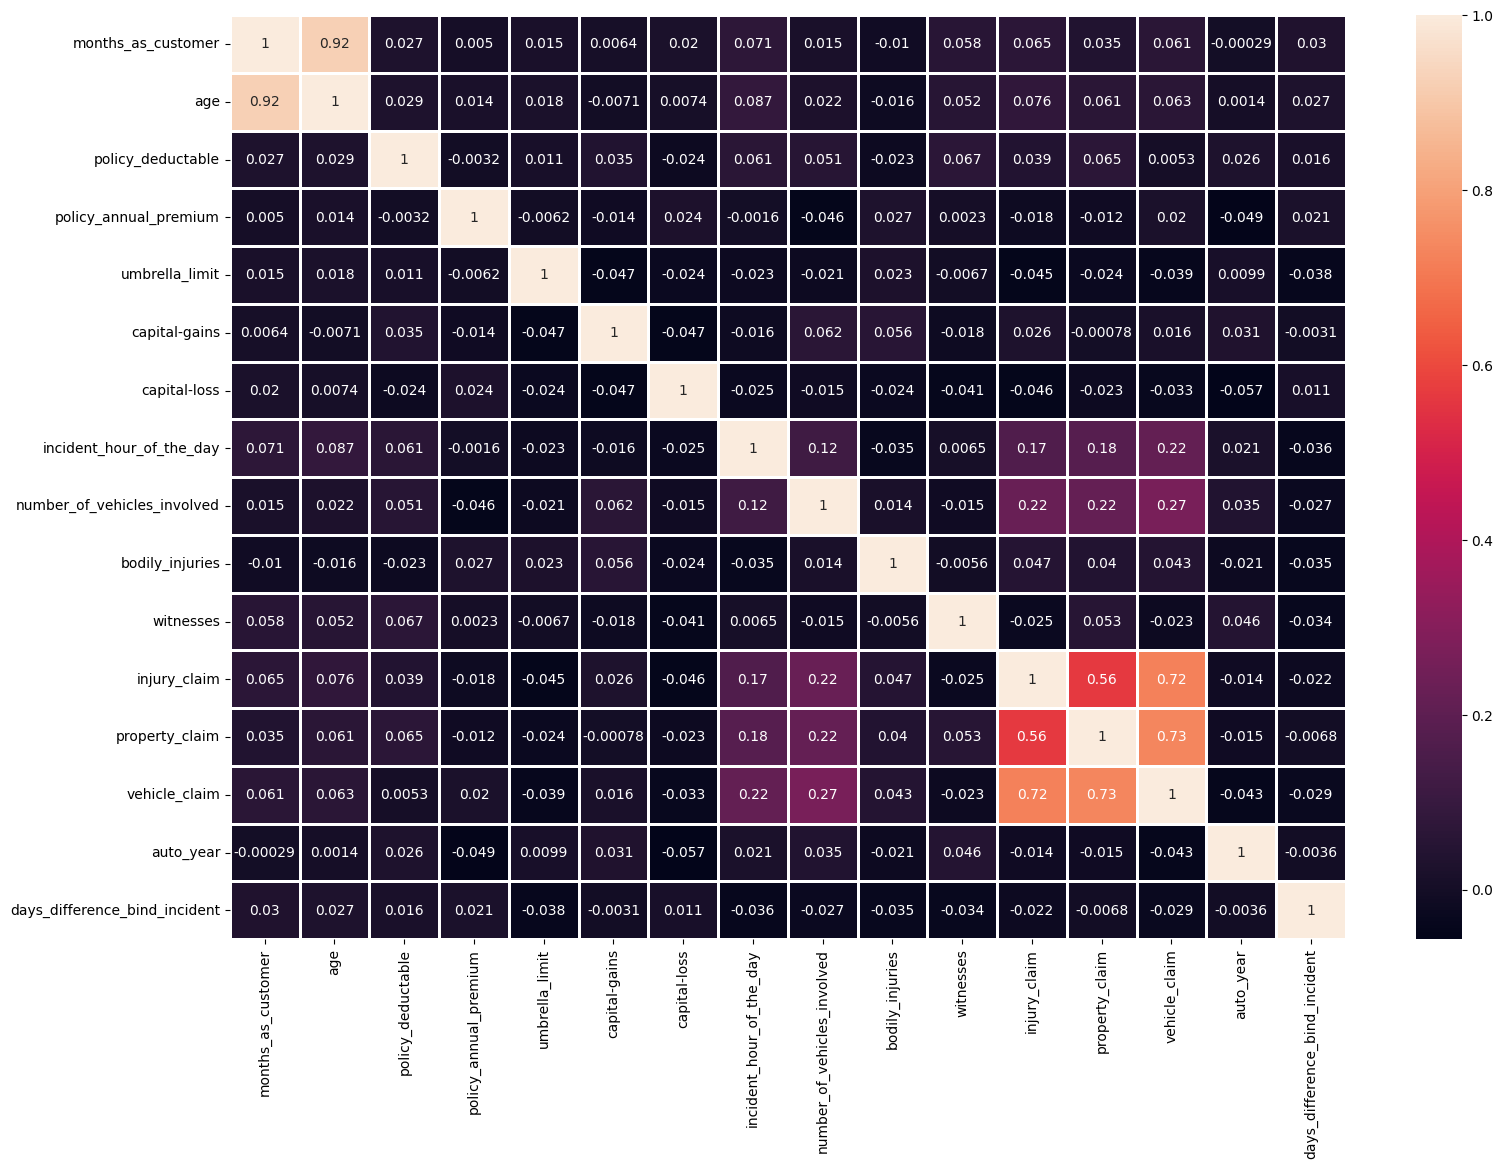

KeyError: "['total_claim_amount'] not found in axis"

In [156]:
# correlation matrix
df_numeric = df.select_dtypes(include=[np.number])
corr = df_numeric.corr()
plt.figure(figsize = (18, 12))
sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

# we get rid of age, we keep months_as_customer since high colinearity (>0.9)
df=df.drop(columns='age')

# we also get rid of total_claim_amount since it's the total amount of injury_claim, property_claim and vehicle_claim.
# high colinearity (>0.8)
df=df.drop(columns='total_claim_amount')

In [157]:
# splitting dataset

X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [158]:
num = X.select_dtypes(include=['int64', 'float64'])
cat = X.select_dtypes(include=['object'])

for col in cat.columns:
    print(f"{col}: \n{cat[col].unique()}\n")


#cat = pd.get_dummies(cat, drop_first = True)
#X = pd.concat([num, cat], axis = 1)
#X.head()

policy_state: 
['IN' 'IL' 'OH']

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['PhD' 'MD' 'College' 'Associate' 'JD' 'Masters' 'High School']

insured_occupation: 
['machine-op-inspct' 'tech-support' 'prof-specialty' 'craft-repair'
 'sales' 'farming-fishing' 'other-service' 'armed-forces' 'adm-clerical'
 'protective-serv' 'transport-moving' 'handlers-cleaners'
 'exec-managerial' 'priv-house-serv']

insured_relationship: 
['not-in-family' 'wife' 'other-relative' 'unmarried' 'own-child' 'husband']

incident_type: 
['Multi-vehicle Collision' 'Parked Car' 'Single Vehicle Collision'
 'Vehicle Theft']

collision_type: 
['Rear Collision' 'Front Collision' 'Side Collision']

incident_severity: 
['Total Loss' 'Trivial Damage' 'Minor Damage' 'Major Damage']

authorities_contacted: 
['Police' 'Ambulance' 'Other' 'Fire' 'None']

incident_state: 
['WV' 'NY' 'SC' 'VA' 'OH' 'NC' 'PA']

incident_city: 
['Arlington' 'Northbrook' 'Hillsdale' '

Index(['months_as_customer', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim', 'auto_year', 'days_difference_bind_incident'],
      dtype='object')


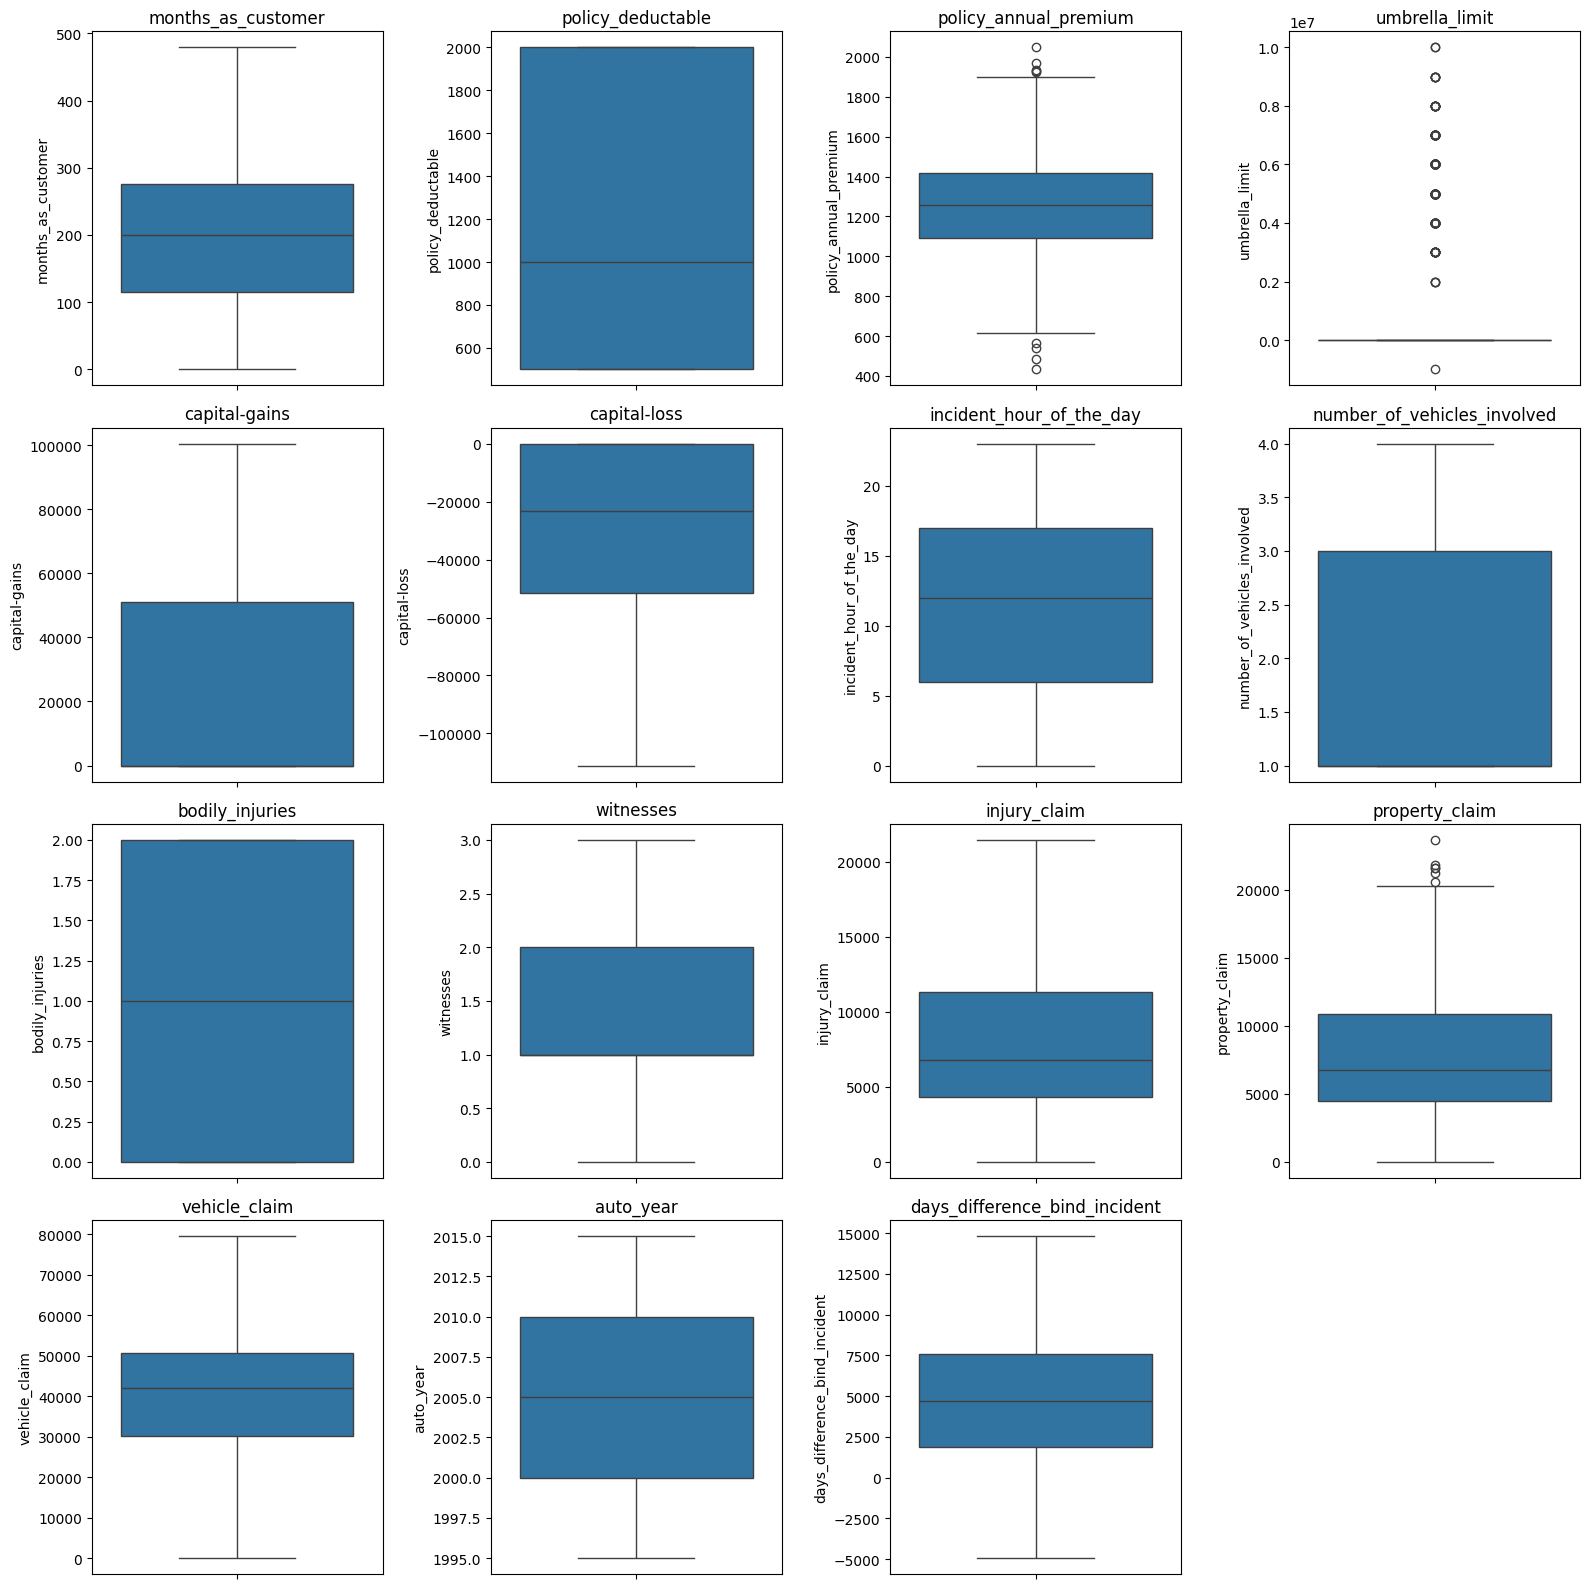

In [159]:
# boxplot 

num_cols = num.columns
print(num_cols)

plt.figure(figsize=(16, 16))  
for i, col in enumerate(num_cols):
    plt.subplot(4, 4, i + 1) 
    sns.boxplot(y=df[col]) 
    plt.title(col)
plt.tight_layout()  
plt.show()

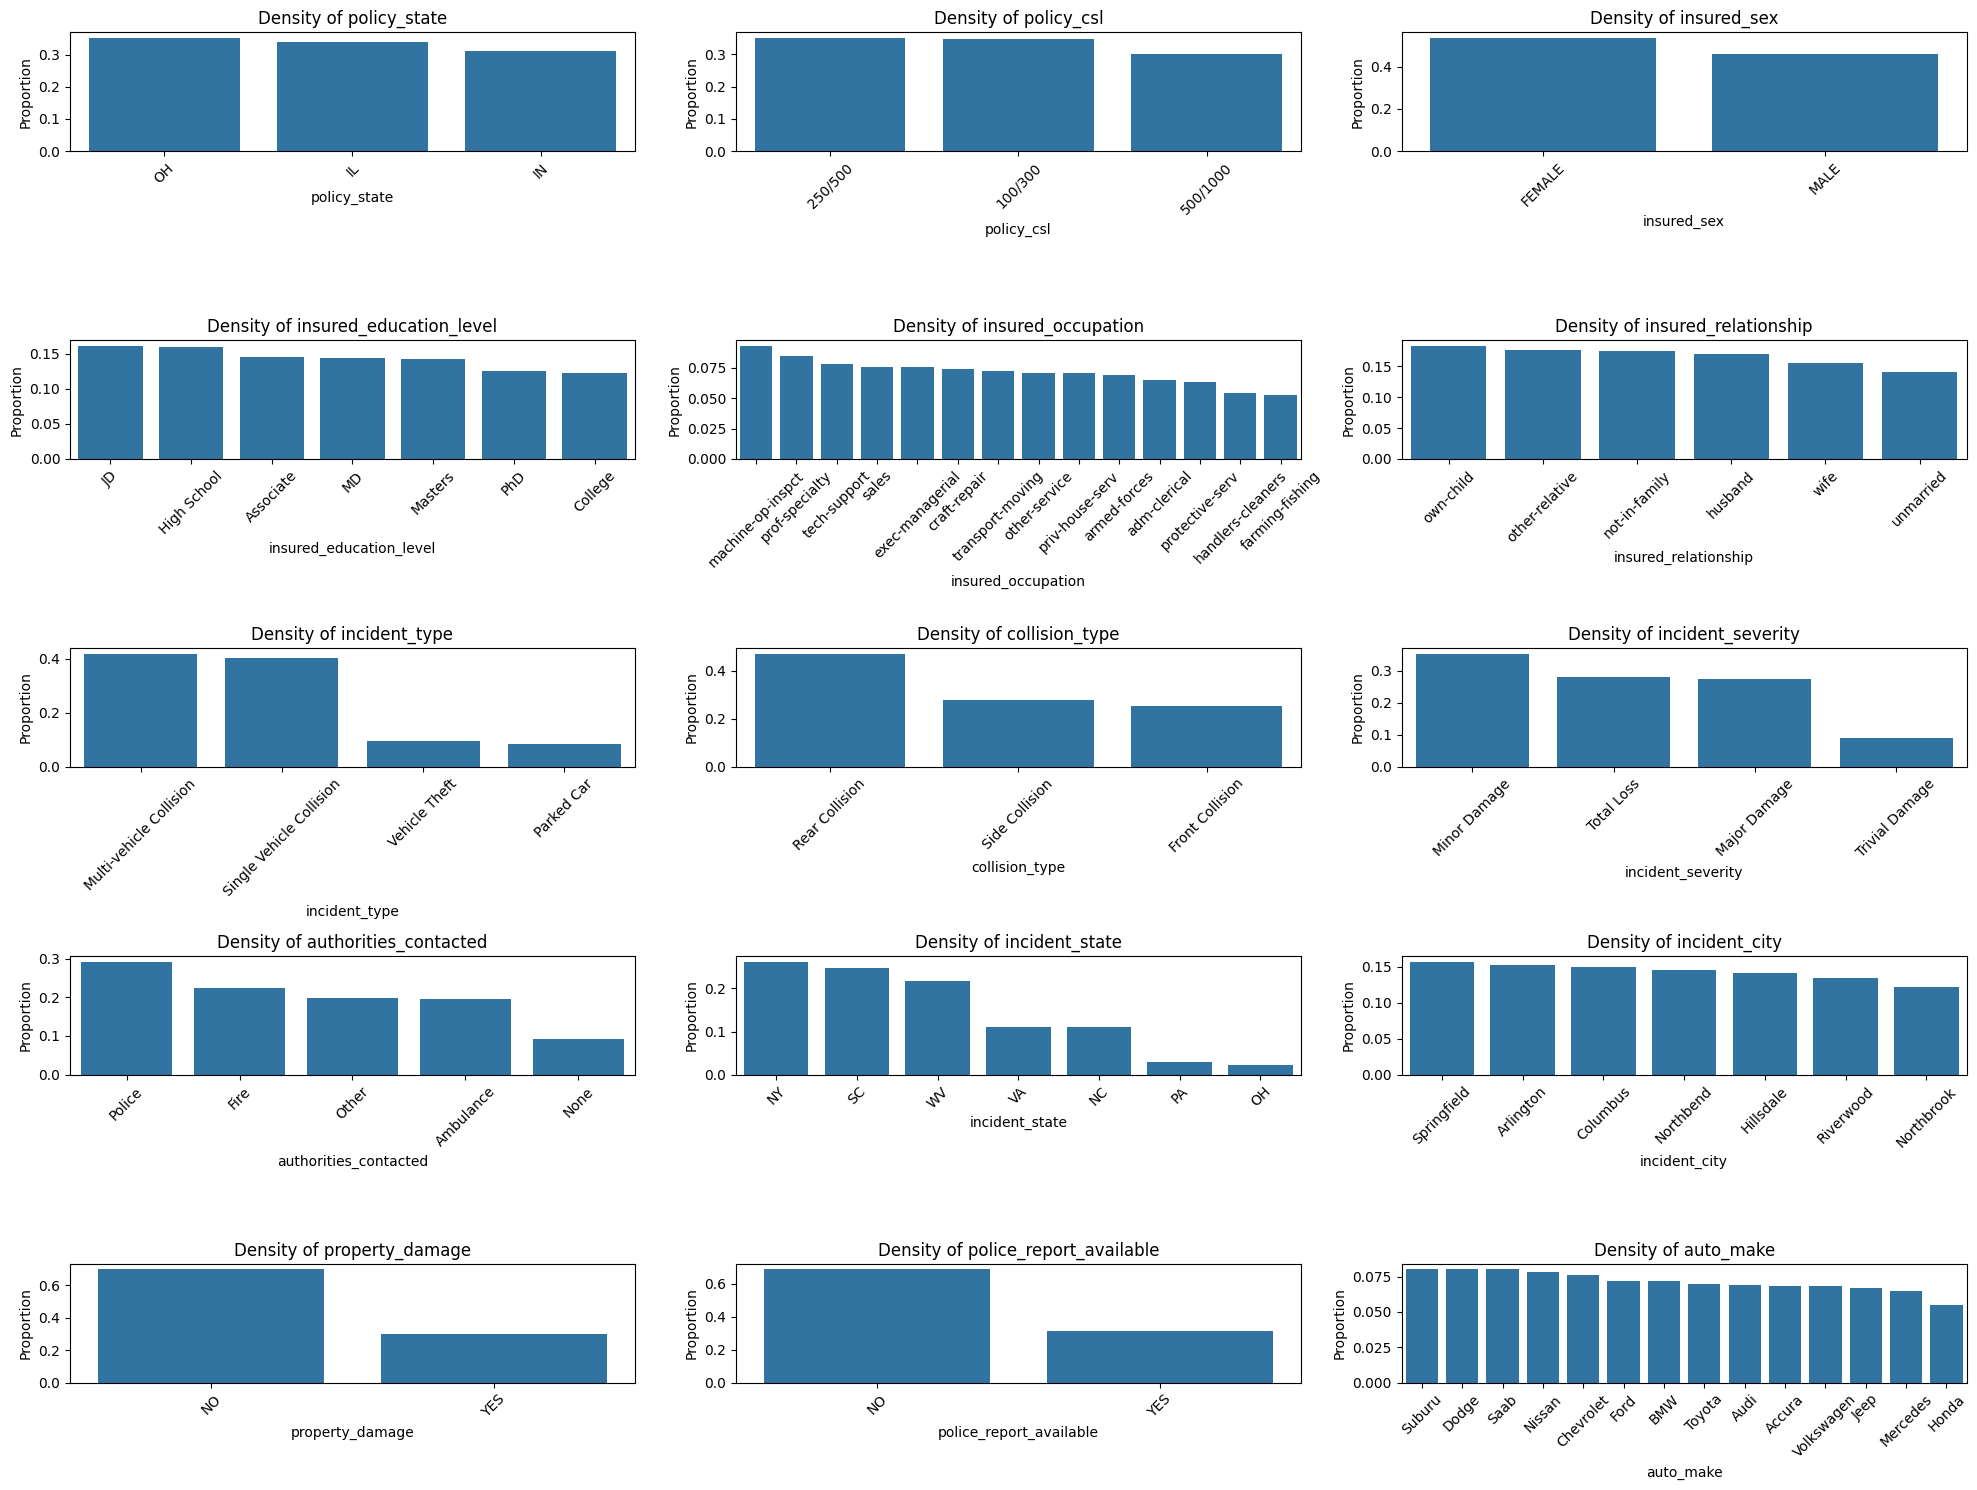

In [160]:
# density bar plot

plt.figure(figsize=(20, 15))  

for i, col in enumerate(cat_cols):
    plt.subplot(5, 3, i + 1) 
    proportions = df[col].value_counts(normalize=True) 
    sns.barplot(x=proportions.index, y=proportions.values) 
    plt.title(f'Density of {col}')  
    plt.xlabel(col) 
    plt.ylabel('Proportion')  
    plt.xticks(rotation=45) 

plt.tight_layout()  
plt.show()

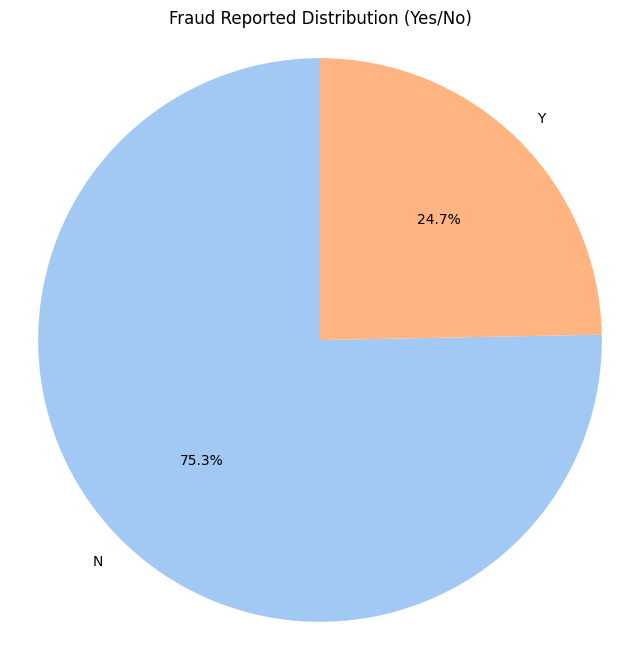

In [161]:
# checking the dependent variable

class_counts = y.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Fraud Reported Distribution (Yes/No)')
plt.axis('equal') 
plt.show()

# moderate level of class imbalance

In [163]:
cat = df.select_dtypes(include=['object'])  
cat_dummies = pd.get_dummies(cat, drop_first=False)
cat_dummies = cat_dummies.astype(int)  

X = pd.concat([num, cat_dummies], axis=1)

print(X.head())

   months_as_customer  policy_deductable  policy_annual_premium  \
0                 415               1000                 973.50   
1                  89               2000                1482.53   
2                 180                500                1272.46   
3                 160                500                1374.22   
4                 256                500                1203.17   

   umbrella_limit  capital-gains  capital-loss  incident_hour_of_the_day  \
0               0          50400             0                        15   
1               0          49100        -45100                         5   
2               0              0             0                         7   
3               0          45500        -37800                        19   
4               0          56700        -65600                        11   

   number_of_vehicles_involved  bodily_injuries  witnesses  ...  \
0                            2                1          3  ...   
1     

In [164]:
# splitting data into training set and test set (80/20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [165]:
X_train.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,fraud_reported_N,fraud_reported_Y
29,119,1000,993.51,0,0,-49500,12,1,0,3,...,0,0,0,0,0,0,0,0,1,0
535,30,500,1488.26,0,0,-63500,17,3,2,2,...,0,0,0,0,1,0,0,0,1,0
695,179,2000,1246.68,0,0,0,10,1,0,1,...,0,0,0,0,0,1,0,0,1,0
557,283,2000,1313.33,0,53500,-73600,3,3,1,3,...,0,0,0,1,0,0,0,0,0,1
836,11,2000,1470.06,0,56600,-45800,22,1,0,1,...,0,0,0,0,1,0,0,0,1,0
